In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings

warnings.filterwarnings('ignore')

In [3]:
##loan_data=pd.read_csv("/Users/sammy/Downloads/loan 3.csv")
loan_data = pd.read_csv('C:/Users/agantait/Downloads/LendingClubCaseStudy/loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Understanding the Data 

In [4]:
#Columns
list(loan_data.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [5]:
#Size of the dataset
loan_data.shape

(39717, 111)

# Dependant Variable = Loan_Status

In [6]:
#Understanding Target variable
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

# Cleaning the data

In [7]:
#Null values 
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
#Percentage Null values
round(loan_data.isnull().sum()/len(loan_data.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [9]:
# removing the columns having more than 90% missing values
missing_columns = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [10]:
#now dropping these columns and getting the shape of new dataset
loan_data = loan_data.drop(missing_columns, axis=1)
print(loan_data.shape)

(39717, 55)


In [11]:
#Understanding No of Vars dropped - We have dropped 56 Vars as they had more than 90% missing values
111 - 55

56

In [12]:
#Chcking new dataset
#Percentage Null values
round(loan_data.isnull().sum()/len(loan_data.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [13]:
# There are now 2 columns having approx 33 and 65% missing values, namely, description and months since last delinquent
#Description has comments when a customer applied for a loan - We can use for some text analysis, we can use it, 
#for this activity we dont need this
#mths_since_last_delinq has details of Customer deliquency in the last 3 months(90 days)
# dropping the two columns
loan_data = loan_data.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [14]:
#Check datatypes
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [15]:
#Changing datatypes of columns (Obeject to float)
# Remove the percentage symbol from 'int_rate' column and convert it to float
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float)

# Print the first few rows of the 'int_rate' column after conversion
print(loan_data[['int_rate']].head())

   int_rate
0     10.65
1     15.27
2     15.96
3     13.49
4     12.69


In [15]:
#Variables which are customer behaviour specific, we wont be able to use them for the analysis 
#as we wont have this data when a customer applies for a loan. In simple words, these variables or information 
#about a customer is generated after the customer is into the system and hence having a future information 
#wont help in the analysis 

In [16]:
Future_vars = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
               'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
               'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
               'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type']

In [17]:
# let's now remove these variables from analysis
loan_data = loan_data.drop(Future_vars, axis=1)
loan_data.shape

(39717, 32)

In [18]:
#Now understanding vars having Meta data or the ones which wont have an impact
loan_data[['title']].head()

,title
0,Computer
1,bike
2,real estate business
3,personel
4,Personal


In [19]:
loan_data[['url']].head()

,url
0,https://lendingclub.com/browse/loanDetail.acti...
1,https://lendingclub.com/browse/loanDetail.acti...
2,https://lendingclub.com/browse/loanDetail.acti...
3,https://lendingclub.com/browse/loanDetail.acti...
4,https://lendingclub.com/browse/loanDetail.acti...


In [20]:
loan_data[['zip_code']].head()

,zip_code
0,860xx
1,309xx
2,606xx
3,917xx
4,972xx


In [21]:
loan_data[['addr_state']].head()

,addr_state
0,AZ
1,GA
2,IL
3,CA
4,OR


In [22]:
#Removing these
loan_data = loan_data.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [23]:
#Indepth Analysis of the depedent var
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [24]:
#Loans as currnet means these loans are ongoing, cant say anything about them as of now, dont need it for analysis

In [24]:
# filtering only fully paid or charged-off
loan_data = loan_data[loan_data['loan_status'] != 'Current']
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan_data['loan_status'].value_counts()

loan_status
0    32950
1     5627
Name: count, dtype: int64

# Basic Univariate analysis

In [25]:
def plot_bar_chart(x_var, y_var):
    """
    Plot a bar chart with specified x and y variables.

    Parameters:
        x_var (str): Name of the variable to be plotted on the x-axis.
        y_var (str): Name of the variable to be plotted on the y-axis.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    sns.barplot(x=x_var, y=y_var, data=loan_data)
    plt.title(f'Bar Chart: {y_var} across {x_var}', fontsize=14)
    plt.xlabel(x_var.capitalize(), fontsize=12)
    plt.ylabel(y_var.capitalize(), fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

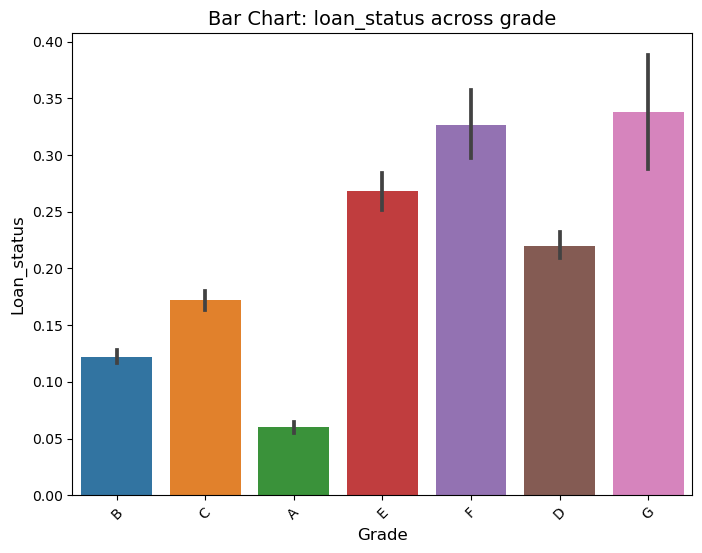

In [26]:
# compare default rates across grade of loan
plot_bar_chart('grade','loan_status')

<Figure size 1000x400 with 0 Axes>

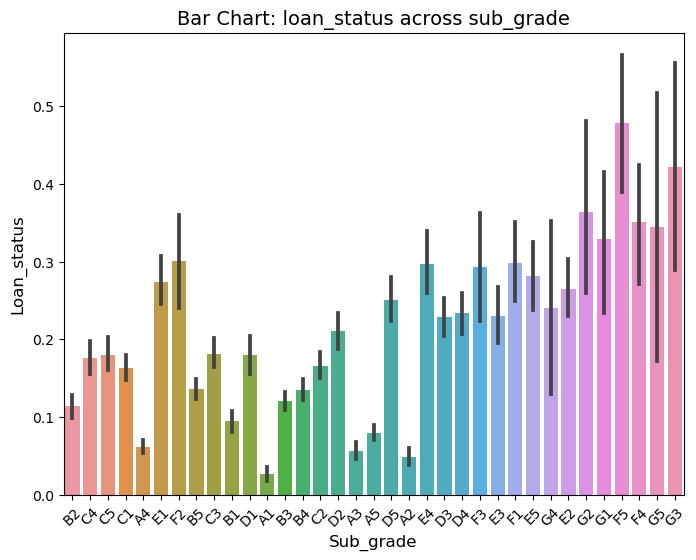

In [27]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(10, 4))
plot_bar_chart('sub_grade','loan_status')

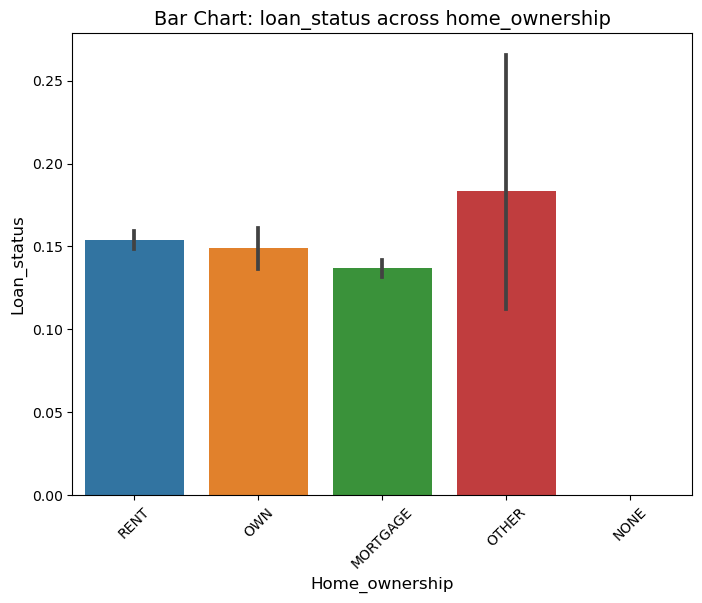

In [28]:
# home ownership: not a great discriminator
plot_bar_chart('home_ownership','loan_status')

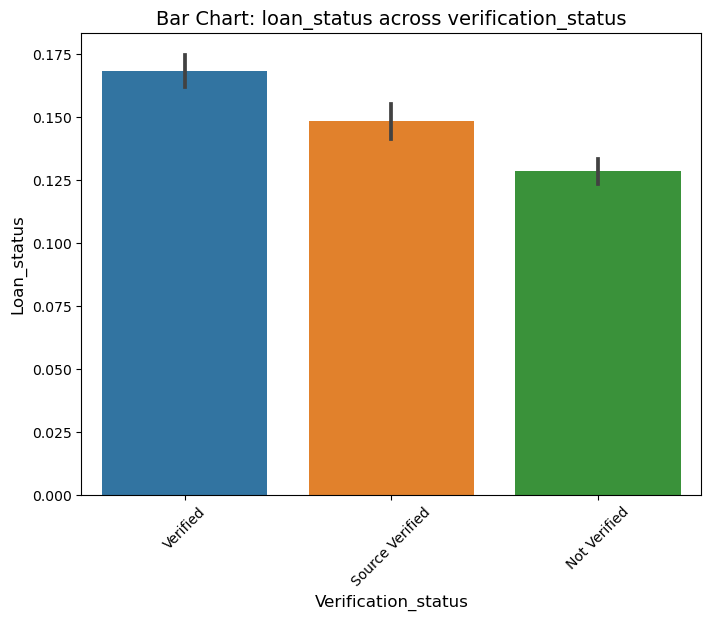

In [29]:
# verification_status: surprisingly, verified loans default more than not verified
plot_bar_chart('verification_status','loan_status')

In [30]:
# Binning Loan amount 
#Define bin edges and labels
bin_edges = [0, 5000, 10000, float('inf')]
bin_labels = ['0-5k', '5k-10k','>10k']

# Bin the 'loan_amount' column and create a new column 'loan_amount_bin'
loan_data['loan_amount_bin'] = pd.cut(loan_data['loan_amnt'], bins=bin_edges, labels=bin_labels, right=False)

              
loan_data['loan_amount_bin'].value_counts()

loan_amount_bin
>10k      19112
5k-10k    12021
0-5k       7444
Name: count, dtype: int64

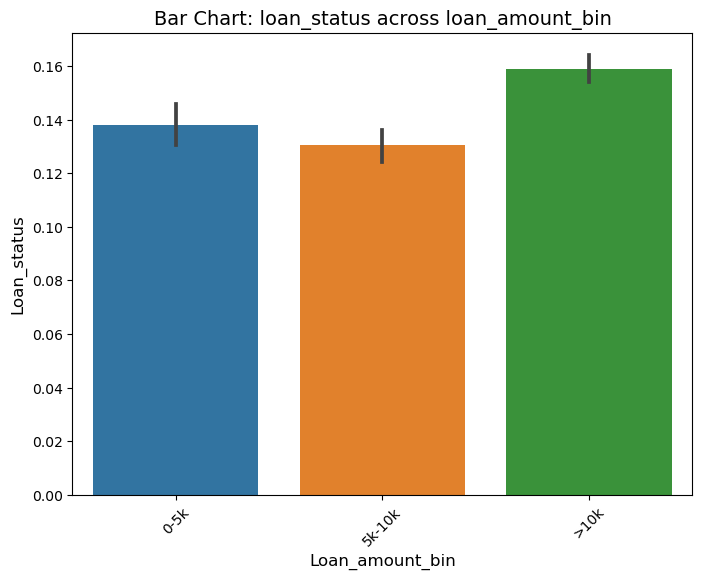

In [31]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_bar_chart('loan_amount_bin','loan_status')

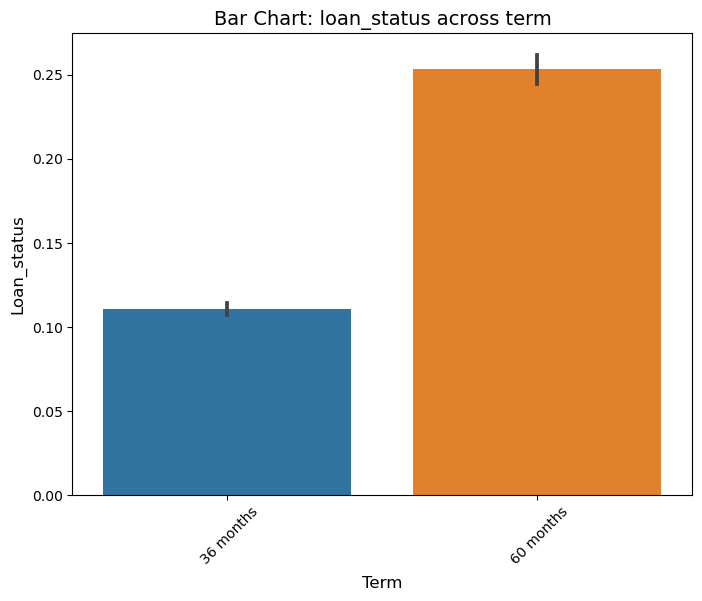

In [32]:
# term: 60 months loans default more than 36 months loans
plot_bar_chart('term','loan_status')

<Figure size 1600x600 with 0 Axes>

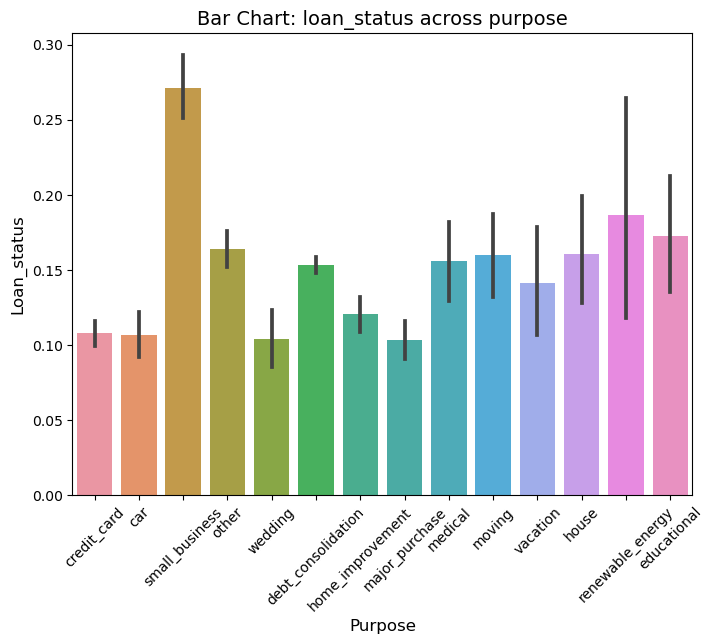

In [33]:
# purpose: small business loans default the most, then renewable energy and education
plt.figure(figsize=(16, 6))
# # Rotating the labels on X-axis to avoid overlapping
# plt.xticks(rotation=40) 

plot_bar_chart('purpose','loan_status')

In [34]:
# Calculate the total number of loans and default loans per bin
bin_counts = loan_data['loan_amount_bin'].value_counts()
default_counts = loan_data[loan_data['loan_status'] == 1]['loan_amount_bin'].value_counts()

# Calculate the default rate per bin
default_rate = (default_counts / bin_counts) * 100

# Print the default rate per bin
print("Default Rate per Bin:")
print(default_rate)

Default Rate per Bin:
loan_amount_bin
>10k      15.869611
5k-10k    13.035521
0-5k      13.796346
Name: count, dtype: float64


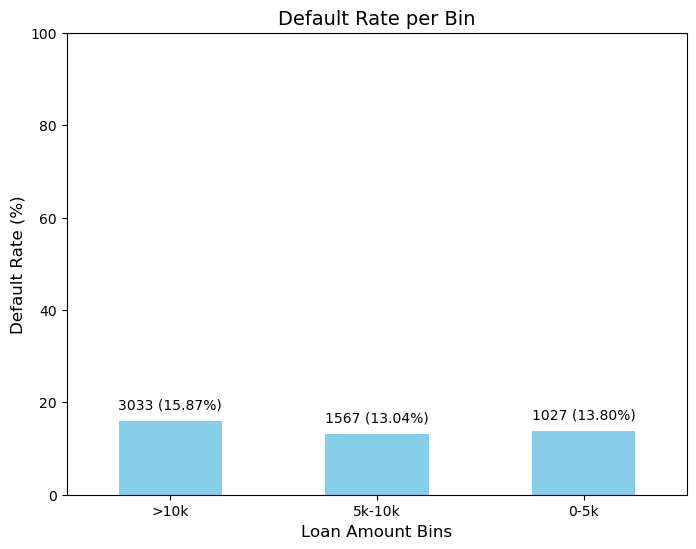

In [35]:
# Plotting the default rate per bin with counts and percentages as labels
plt.figure(figsize=(8, 6))
ax = default_rate.plot(kind='bar', color='skyblue')
plt.title('Default Rate per Bin', fontsize=14)
plt.xlabel('Loan Amount Bins', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100

# Displaying default counts and percentages as labels on top of each bar
for i, v in enumerate(default_rate):
    ax.text(i, v + 2, f'{default_counts[i]} ({v:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.show()


In [36]:
# Binning the 'funded_amnt_inv' column and create a new column 'funded_amnt_inv_bin'
loan_data['funded_amnt_inv_bin'] = pd.cut(loan_data['funded_amnt_inv'], bins=bin_edges, labels=bin_labels, right=False)
              
loan_data['funded_amnt_inv_bin'].value_counts()

funded_amnt_inv_bin
>10k      16383
5k-10k    12787
0-5k       9407
Name: count, dtype: int64

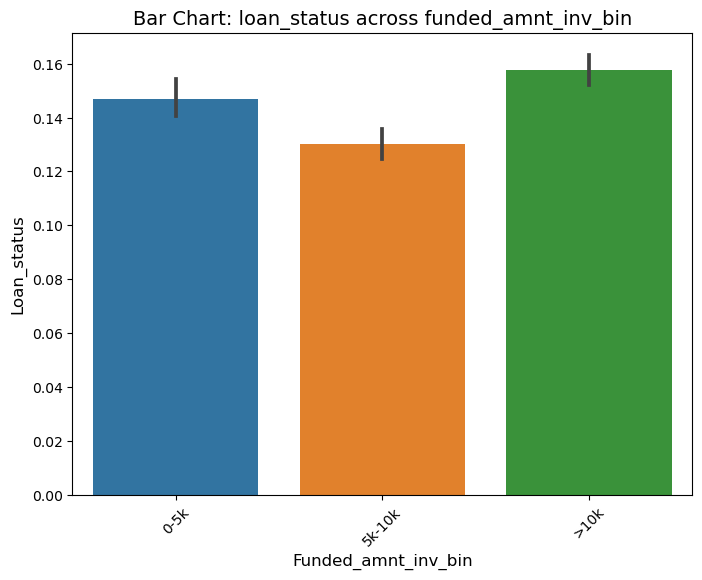

In [37]:
# let's compare the default rates across loan amount type
# higher the funded amount, higher the default rate
plot_bar_chart('funded_amnt_inv_bin','loan_status')

In [38]:
# Binning Intrest Rate 
#Define bin edges and labels
bin_edges = [0, 4, 8, 12, 16, float('inf')]
bin_labels = ['0-4', '4-8','8-12', '12-16','>16']

# Bin the 'loan_amount' column and create a new column 'loan_amount_bin'
loan_data['int_rate_bin'] = pd.cut(loan_data['int_rate'], bins=bin_edges, labels=bin_labels, right=False)

              
loan_data['int_rate_bin'].value_counts()

int_rate_bin
8-12     12634
12-16    12413
4-8       8027
>16       5503
0-4          0
Name: count, dtype: int64

In [39]:
# Calculate the total number of loans and default loans per bin
bin_counts = loan_data['int_rate_bin'].value_counts()
default_counts = loan_data[loan_data['loan_status'] == 1]['int_rate_bin'].value_counts()

# Calculate the default rate per bin
default_rate = (default_counts / bin_counts) * 100

# Print the default rate per bin
print("Default Rate per Interest rate Bin:")
print(default_rate)

Default Rate per Interest rate Bin:
int_rate_bin
0-4            NaN
4-8       5.356920
8-12     11.603609
12-16    17.336663
>16      28.693440
Name: count, dtype: float64


posx and posy should be finite values
posx and posy should be finite values


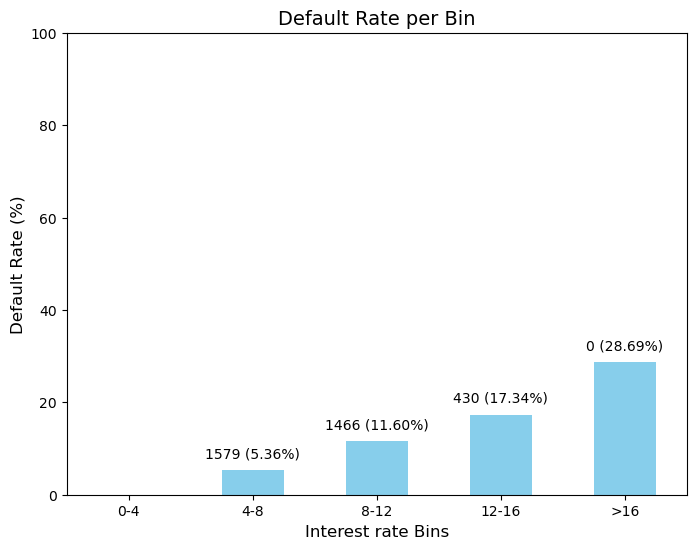

In [40]:
# Plotting the default rate per bin with counts and percentages as labels
plt.figure(figsize=(8, 6))
ax = default_rate.plot(kind='bar', color='skyblue')
plt.title('Default Rate per Bin', fontsize=14)
plt.xlabel('Interest rate Bins', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100

# Displaying default counts and percentages as labels on top of each bar
for i, v in enumerate(default_rate):
    ax.text(i, v + 2, f'{default_counts[i]} ({v:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.show()


In [41]:
# debt to income ratio
# Bin the 'loan_amount' column and create a new column 'loan_amount_bin'
loan_data['dti_bin'] = pd.cut(loan_data['dti'], bins=bin_edges, labels=bin_labels, right=False)
              
loan_data['dti_bin'].value_counts()

dti_bin
>16      14146
12-16     7817
8-12      7203
4-8       5623
0-4       3788
Name: count, dtype: int64

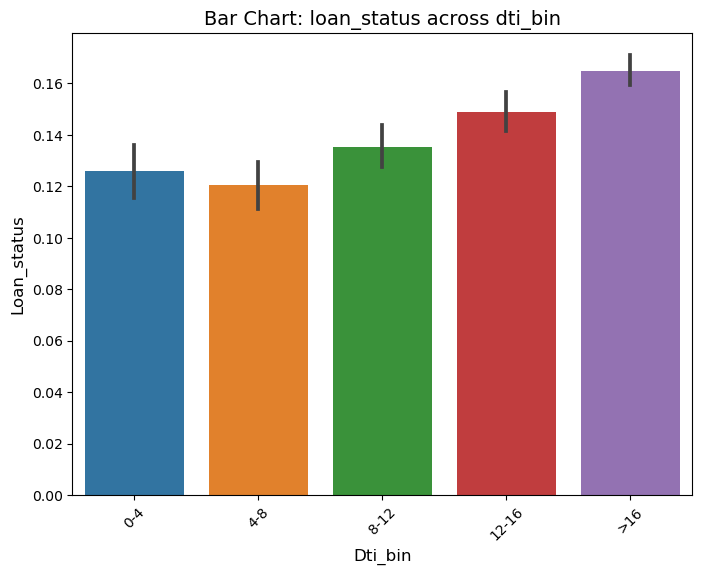

In [42]:
# debt to income ratio
#high dti translates into higher default rates, as expected
plot_bar_chart('dti_bin','loan_status')

In [43]:
# installment
# Binning installment amount 
#Define bin edges and labels
bin_edges = [0, 200, 400,600, float('inf')]
bin_labels = ['0-200', '200-400','400-600','600']

# Bin the 'loan_amount' column and create a new column 'loan_amount_bin'
loan_data['installment_bin'] = pd.cut(loan_data['installment'], bins=bin_edges, labels=bin_labels, right=False)

              
loan_data['installment_bin'].value_counts()

installment_bin
200-400    14732
0-200      13074
400-600     6563
600         4208
Name: count, dtype: int64

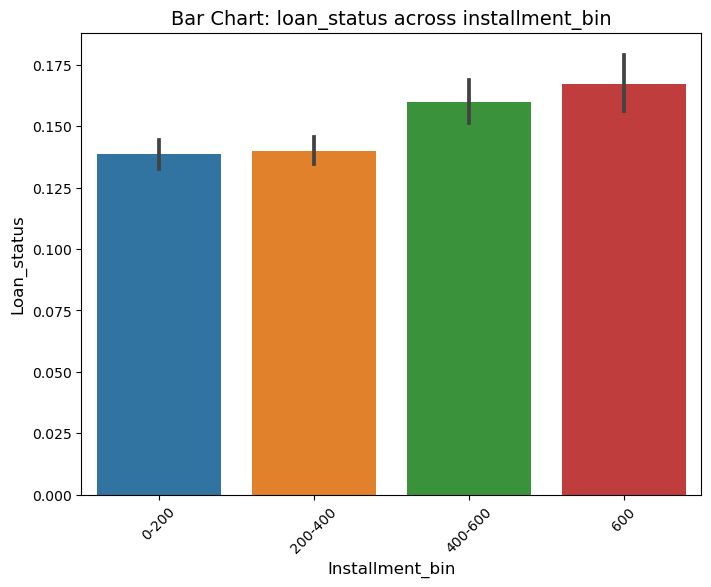

In [44]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_bar_chart('installment_bin','loan_status')

In [45]:
# installment
# Binning Income  
#Define bin edges and labels
bin_edges = [0, 50000, 100000,150000, float('inf')]
bin_labels = ['0-50K', '50K-100K','100K-150K','>150K']

# Bin the 'loan_amount' column and create a new column 'loan_amount_bin'
loan_data['annual_inc_bin'] = pd.cut(loan_data['annual_inc'], bins=bin_edges, labels=bin_labels, right=False)

              
loan_data['annual_inc_bin'].value_counts()

annual_inc_bin
50K-100K     18238
0-50K        14360
100K-150K     4270
>150K         1709
Name: count, dtype: int64

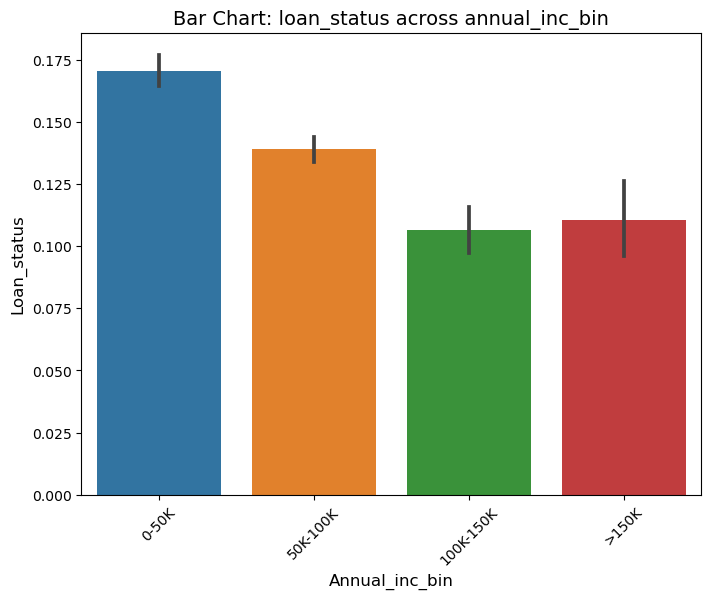

In [46]:
plot_bar_chart('annual_inc_bin','loan_status')

In [47]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_amount_bin,funded_amnt_inv_bin,int_rate_bin,dti_bin,installment_bin,annual_inc_bin
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,0,n,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0,5k-10k,0-5k,8-12,>16,0-200,0-50K
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,n,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0,0-5k,0-5k,12-16,0-4,0-200,0-50K
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,0,n,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0,0-5k,0-5k,12-16,8-12,0-200,0-50K
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,n,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0,>10k,>10k,12-16,>16,200-400,0-50K
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,n,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0,5k-10k,5k-10k,4-8,8-12,0-200,0-50K


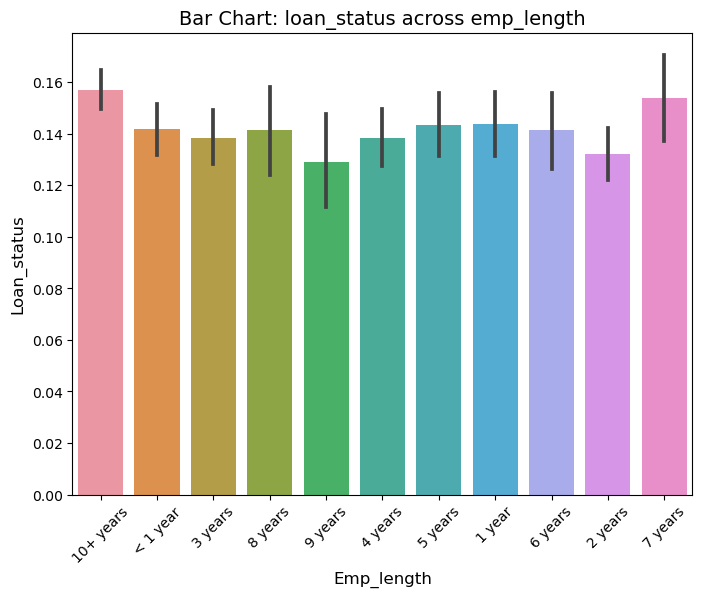

In [48]:
plot_bar_chart('emp_length','loan_status')

In [49]:
#  convert employment length into numeric


loan_data = loan_data[~loan_data['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: pd.to_numeric(x))
loan_data['emp_length'].value_counts()

emp_length
10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

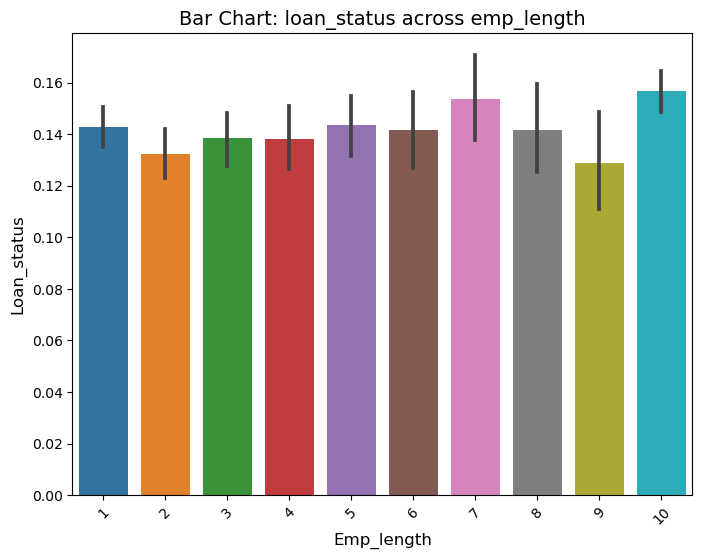

In [50]:
plot_bar_chart('emp_length','loan_status')

# BiVariate Analysis

In [58]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_amount_bin',
       'funded_amnt_inv_bin', 'int_rate_bin', 'dti_bin', 'installment_bin',
       'annual_inc_bin'],
      dtype='object')

<Axes: xlabel='term', ylabel='loan_amnt'>

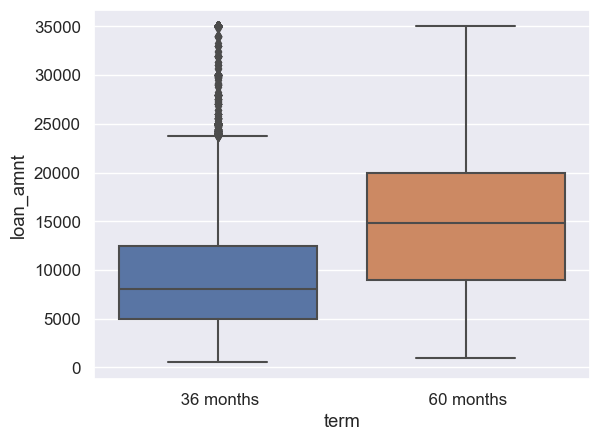

In [74]:
## higher term is taken for a higher loan value
sns.boxplot(x = 'term', y = 'loan_amnt', data=loan_data)

<Axes: xlabel='term', ylabel='int_rate'>

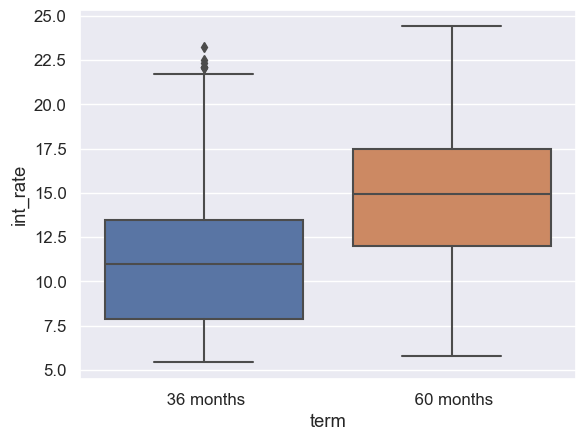

In [76]:
## interest rate is higher for a higher term
sns.boxplot(x = 'term', y = 'int_rate', data=loan_data)

In [77]:
loan_data.annual_inc_bin.unique()

['0-50K', '50K-100K', '100K-150K', '>150K']
Categories (4, object): ['0-50K' < '50K-100K' < '100K-150K' < '>150K']

In [83]:
annual_inc_range_vs_loan = loan_data.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['chargeoff_within_12_mths']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

ValueError: Could not interpret input 'chargeoff_within_12_mths'

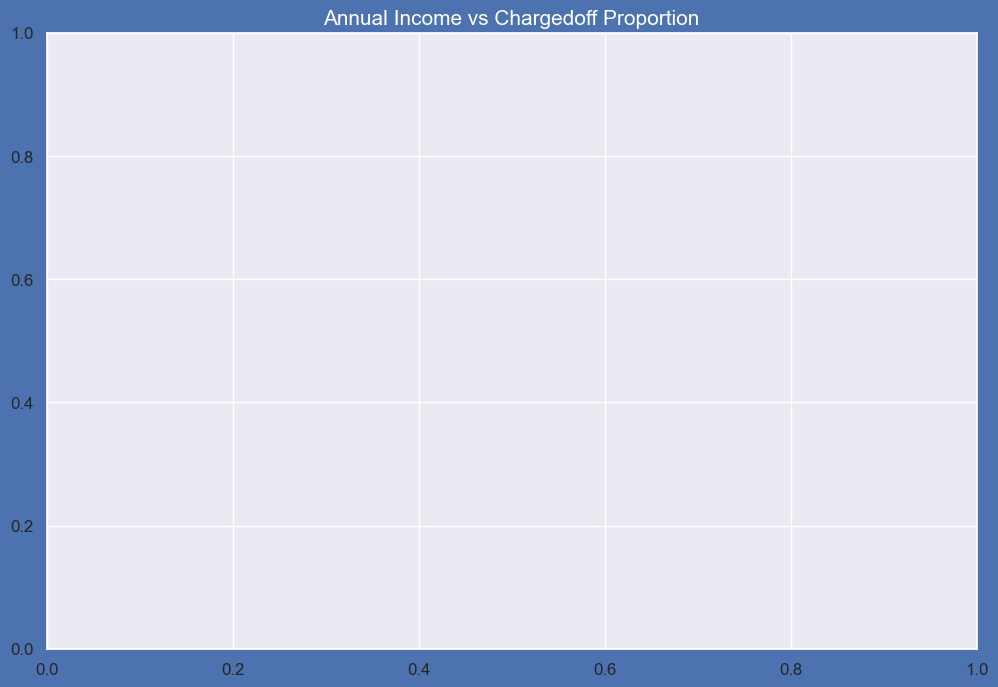

In [85]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_bin', y='chargeoff_within_12_mths', data=annual_inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plot.show()